In [4]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=3, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote/'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [5]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/different_workloads/kaggle_home_credit/cloud-41'
result_file = result_folder + '/2019-10-10.csv'

In [6]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload', 'type', 'mat_rate', 'run_time'
]
execution_order = {
    'start_here_a_gentle_introduction': 1,
    'introduction_to_manual_feature_engineering': 2,
    'introduction_to_manual_feature_engineering_p2': 3,
    'fork_cridata_start_here_a_gentle_introduction': 4,
    'fork_taozhongxiao_start_here_a_gentle_introduction': 5,
    'fork_introduction_to_manual_feature_engineering': 6,
    'fork_introduction_to_manual_feature_engineering_p2': 7,
    'fork_join_start_here_intro': 8
}
method_map = {'optimized': 'CO', 'baseline': 'KG'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(
    execution_order)
#execution_times = execution_times[execution_times['workload_order'] > 0]
execution_times['cumulative_run_time'] = execution_times.groupby(
    ['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['type'] = execution_times['type'].replace(method_map)
#execution_times['workload_order'] = execution_times['workload'].replace(execution_order)

In [7]:
def plot_executions_reuse(df, loc=''):
    plt.figure(figsize=(10,4))
    plot = sns.lineplot(
        data=df,
        x='workload_order',
        y='cumulative_run_time',
        hue='type',
        style='type',
        markers=["^", "o"],
        lw=3,
        hue_order=['KG', 'CO'],
       # style_order = ['baseline', 'optimized'],
        dashes=[(2, 2), (1, 0)],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR
        },
        legend='brief')

    legend = plot.legend()
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    plot.set_xlabel('Workload', fontsize=22)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=22)
    #plot.set_xlim((1,2))
    plot.set_ylim((0,2200))
    plot.set_xticks(range(1,9))
    plot.set_xticklabels(range(1,9))
    #plt.tight_layout()
    plt.savefig(loc, bbox_inches ='tight')

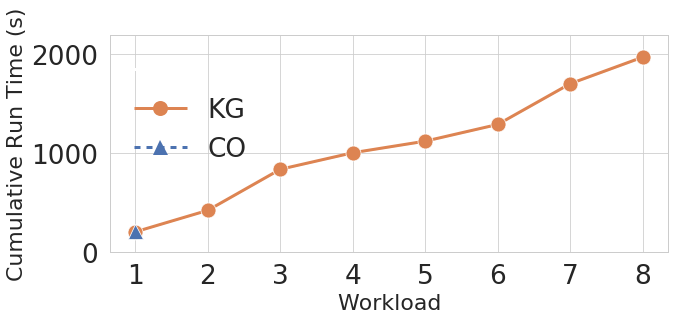

In [8]:
plot_executions_reuse(execution_times, output_directory+'/different_workloads.pgf')

In [9]:
execution_times

,timestamp,exp_id,repo,workload,type,mat_rate,run_time,workload_order,cumulative_run_time
0,16:10:55,D47F82EE,kaggle_home_credit,start_here_a_gentle_introduction,CO,33554432.0,218.183439,1,218.183439
1,16:14:52,1FED6DE7,kaggle_home_credit,start_here_a_gentle_introduction,KG,0.0,204.955268,1,204.955268
2,16:14:52,1FED6DE7,kaggle_home_credit,introduction_to_manual_feature_engineering,KG,0.0,218.509901,2,423.465169
3,16:14:52,1FED6DE7,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,KG,0.0,416.014017,3,839.479186
4,16:14:52,1FED6DE7,kaggle_home_credit,fork_cridata_start_here_a_gentle_introduction,KG,0.0,167.504747,4,1006.983933
5,16:14:52,1FED6DE7,kaggle_home_credit,fork_taozhongxiao_start_here_a_gentle_introduc...,KG,0.0,116.407790,5,1123.391723
6,16:14:52,1FED6DE7,kaggle_home_credit,fork_introduction_to_manual_feature_engineering,KG,0.0,169.318320,6,1292.710043
7,16:14:52,1FED6DE7,kaggle_home_credit,fork_introduction_to_manual_feature_engineerin...,KG,0.0,412.032802,7,1704.742845
8,16:14:52,1FED6DE7,kaggle_home_credit,fork_join_start_here_intro,KG,0.0,269.110219,8,1973.853064
9,16:47:47,78E2B8C3,kaggle_home_credit,start_here_a_gentle_introduction,CO,33554432.0,216.797597,1,216.797597
